In [58]:
options(digits=4)

# Heart Disease Dataset

_Lars Rotgers (rotg1700@student.nhl.nl), Rosa de Haan (haan1700@student.nhl.nl), Toegepaste Wiskunde, 25 maart 2019_.

Voor de eerste opdracht voor multivariate statistiek zijn er de volgende producteisen:

 1. Visuele inspectie met plots.
 2. Correlatiematrix en onderzoek collineariteit.
 3. Bepaal regressievergelijkingen gebaseerd op alle verklarende variabelen.
 4. Mogelijke uitkomsten berekenen en controleren.
 5. Bepaal de verklaarde/onverklaarde en de totale variantie.
 6. Bepaal de determinatiecoefficient $R^2$.
 7. Bepaal het best passende model met één variabele.
 8. Controleer de uitkomst van de regressielijn.
 9. Bepaal het best passende model met twee variabelen.
 10. Controleer de uitkomst van de regressielijn.
 11. Bepaal of het zinvol is om meer variabelen toe te voegen aan het model.
 12. Bepaal de regressielijn met de relevante variabelen.

Voor de opdracht maken we gebruik van de _heart disease dataset_. Deze dataset is verkregen via de onderstaande link:

 * https://www.kaggle.com/ronitf/heart-disease-uci

In [59]:
df = read.csv('heart.csv')

# kolomnaam herstellen; er staat '`..age'
names = colnames(df); 
names[1] = 'age' 
colnames(df) = names

head(df)
print(paste('Er zijn', nrow(df), 'rijen, en', length(df), ' kolommen.'))

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


[1] "Er zijn 303 rijen, en 14  kolommen."


# Kolommen

In de dataset zitten de volgende kolommen:

1. `age`: leeftijd. (Ratio)
2. `sex`: geslacht. (Nominaal)
3. `cp`: chest pain type (4 values). (Nominaal)
4. `trestbps`: resting blood pressure. (Ratio)
5. `chol`: serum cholestoral in mg/dl. (Ratio)
6. `fbs`: fasting blood sugar > 120 mg/dl. (Nominaal)
7. `restecg`: resting electrocardiographic results (values 0, 1, 2). (Nominaal)
8. `thalanch`: maximum heartrate achieved. (Ratio)
9. `exang`: exercise induced angina. (Nominaal)
10. `oldpeak`: ST depression induced by exercise relative to test. (Ratio)
11. `slope`: the slope of the peak exercise ST segment. (Nominaal)
12. `ca`: number of major vessels (0-3) color by flourosopy. (Ordinaal)
13. `thal`: 3 = normal, 6 = fixed defect, 7 = reversable defect. (Ordinaal)
14. `target`: indicated if someone has heart disease, 0 = false, 1 = true. (Ordinaal)

# Onderzoeksvraag

Oorspronkelijk is het de bedoeling dat met behulp van machine learning een classifier wordt opgesteld om vast te stellen of, gebaseerd op enkele gegevens, een patiënt hartziekten heeft. Echter geldt er voor dit onderzoek een andere onderzoeksvraag, namelijk: Welke factoren hebben effect op de maximale hartslag (veld `thalanch`).

# Beschrijvende statistiek

Om een eerste indruk te krijgen van de gegevens in de dataset bepalen we met `summary` enkele algemene gegevens:

In [60]:
summary(df)

      age            sex              cp           trestbps        chol    
 Min.   :29.0   Min.   :0.000   Min.   :0.000   Min.   : 94   Min.   :126  
 1st Qu.:47.5   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:120   1st Qu.:211  
 Median :55.0   Median :1.000   Median :1.000   Median :130   Median :240  
 Mean   :54.4   Mean   :0.683   Mean   :0.967   Mean   :132   Mean   :246  
 3rd Qu.:61.0   3rd Qu.:1.000   3rd Qu.:2.000   3rd Qu.:140   3rd Qu.:274  
 Max.   :77.0   Max.   :1.000   Max.   :3.000   Max.   :200   Max.   :564  
      fbs           restecg         thalach        exang          oldpeak    
 Min.   :0.000   Min.   :0.000   Min.   : 71   Min.   :0.000   Min.   :0.00  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:134   1st Qu.:0.000   1st Qu.:0.00  
 Median :0.000   Median :1.000   Median :153   Median :0.000   Median :0.80  
 Mean   :0.148   Mean   :0.528   Mean   :150   Mean   :0.327   Mean   :1.04  
 3rd Qu.:0.000   3rd Qu.:1.000   3rd Qu.:166   3rd Qu.:1.000   3rd Qu.:1.60  


Om een idee te krijgen hoe de data is verdeeld binnen de verschillende variabelen worden er staafdiagrammen opgesteld voor de nominale/ordinale variabelen en histogrammen voor de ratio variabelen.

## Staafdiagrammen voor nominale/ordinale variabelen

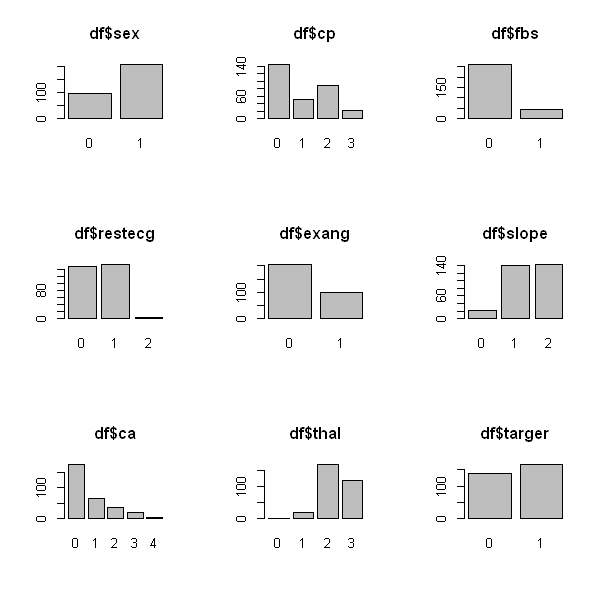

In [61]:
par(mfrow=c(3,3))
barplot(table(df$sex), main="df$sex")
barplot(table(df$cp), main="df$cp")
barplot(table(df$fbs), main="df$fbs")
barplot(table(df$restecg), main="df$restecg")
barplot(table(df$exang), main="df$exang")
barplot(table(df$slope), main="df$slope")
barplot(table(df$ca), main="df$ca")
barplot(table(df$thal), main="df$thal")
barplot(table(df$target), main="df$targer")

## Histogrammen voor ratio variabelen

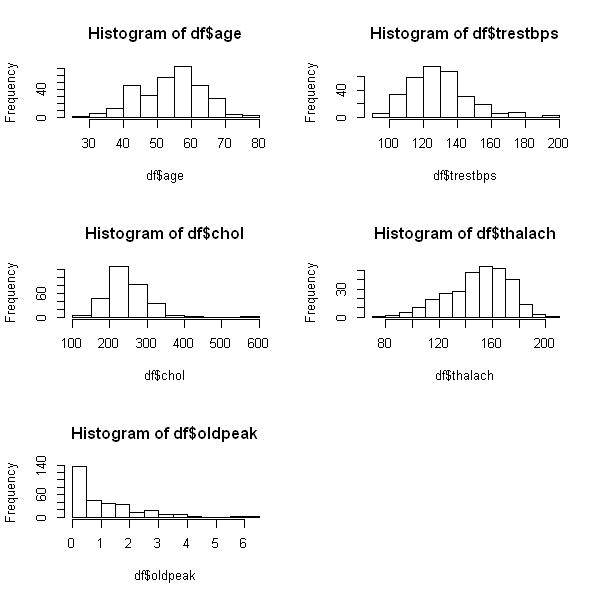

In [62]:
par(mfrow=c(3, 2))
hist(df$age)
hist(df$trestbps)
hist(df$chol)
hist(df$thalach)
hist(df$oldpeak)

# Correlatieplots

Om de correlatie tussen de variabelen te analyseren is een correlatieplot handig. Het volgende figuur is een plot van alle variabelen waarvan het meetniveau ratio is.

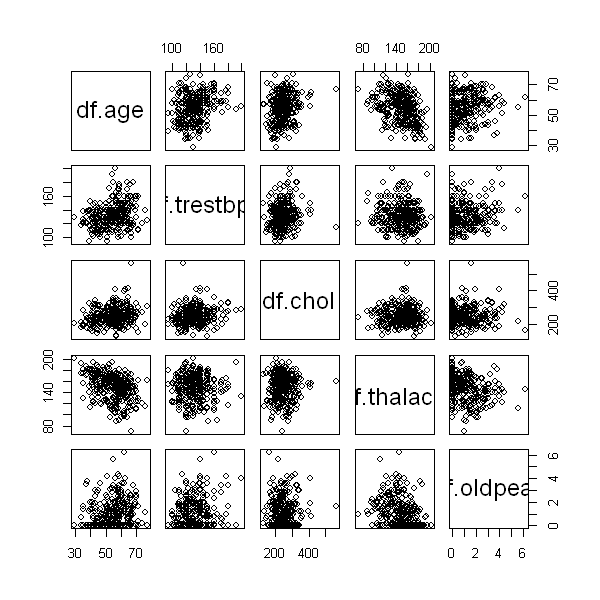

In [71]:
plot(data.frame(df$age, df$trestbps, df$chol, df$thalach, df$oldpeak))

Kijkende naar de resultaten, is te zien dat de correlaties vrij zwak zijn. Voor de exacte correlatiecoefficienten kijken we naar de correlatiematrix voor de ratio variabelen:

In [72]:
cor(data.frame(df$age, df$trestbps, df$chol, df$thalach, df$oldpeak))

,df.age,df.trestbps,df.chol,df.thalach,df.oldpeak
df.age,1.0000,0.2794,0.21368,-0.39852,0.21001
df.trestbps,0.2794,1.0000,0.12317,-0.04670,0.19322
df.chol,0.2137,0.1232,1.00000,-0.00994,0.05395
df.thalach,-0.3985,-0.0467,-0.00994,1.00000,-0.34419
df.oldpeak,0.2100,0.1932,0.05395,-0.34419,1.00000


De correlatie die er het meeste uitspringt is dat de leeftijd een negatief effect heeft op de maximaal te behalen hartslag. 

# Correlatiematrix en collineariteit

Om uit te zoeken wat de samenhang tussen de variabelen is, is het handig om naar de correlatiematrix te kijken.

In [63]:
cor(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00000,-0.09845,-0.06865,0.27935,0.213678,0.121308,-0.11621,-0.398522,0.09680,0.210013,-0.168814,0.27633,0.06800,-0.22544
sex,-0.09845,1.00000,-0.04935,-0.05677,-0.197912,0.045032,-0.05820,-0.044020,0.14166,0.096093,-0.030711,0.11826,0.21004,-0.28094
cp,-0.06865,-0.04935,1.00000,0.04761,-0.076904,0.094444,0.04442,0.295762,-0.39428,-0.149230,0.119717,-0.18105,-0.16174,0.43380
trestbps,0.27935,-0.05677,0.04761,1.00000,0.123174,0.177531,-0.11410,-0.046698,0.06762,0.193216,-0.121475,0.10139,0.06221,-0.14493
chol,0.21368,-0.19791,-0.07690,0.12317,1.000000,0.013294,-0.15104,-0.009940,0.06702,0.053952,-0.004038,0.07051,0.09880,-0.08524
fbs,0.12131,0.04503,0.09444,0.17753,0.013294,1.000000,-0.08419,-0.008567,0.02567,0.005747,-0.059894,0.13798,-0.03202,-0.02805
restecg,-0.11621,-0.05820,0.04442,-0.11410,-0.151040,-0.084189,1.00000,0.044123,-0.07073,-0.058770,0.093045,-0.07204,-0.01198,0.13723
thalach,-0.39852,-0.04402,0.29576,-0.04670,-0.009940,-0.008567,0.04412,1.000000,-0.37881,-0.344187,0.386784,-0.21318,-0.09644,0.42174
exang,0.09680,0.14166,-0.39428,0.06762,0.067023,0.025665,-0.07073,-0.378812,1.00000,0.288223,-0.257748,0.11574,0.20675,-0.43676
oldpeak,0.21001,0.09609,-0.14923,0.19322,0.053952,0.005747,-0.05877,-0.344187,0.28822,1.000000,-0.577537,0.22268,0.21024,-0.43070


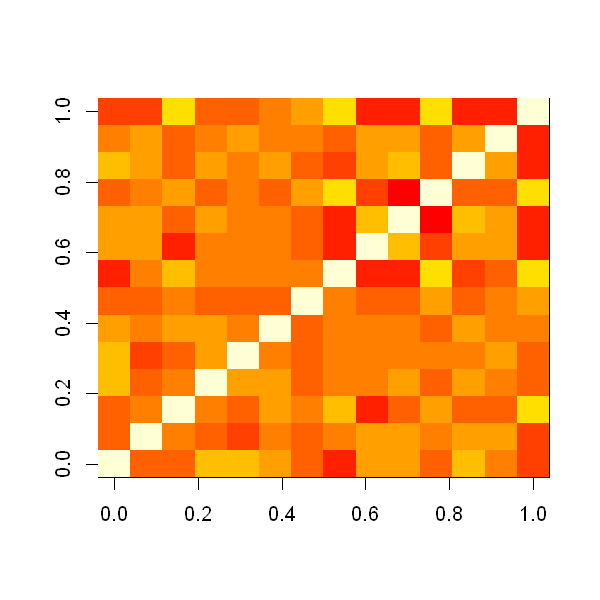

In [70]:
image(cor(df))